# 1. Data visualization

In [3]:
#import necessary libraries for reading the data
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read the data
credit_data = pd.read_csv('creditcard.csv')
credit_data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,debt_to_income,outcome
0,NNVBBKZB,Female,71.0,RG268,Other,X3,43.0,No,3867780.0,No,0.0,22.50,paid off
1,IDD62UNG,Female,62.0,RG277,Salaried,X1,32.0,No,7264402.0,No,0.0,21.33,default
2,HD3DSEMC,Female,53.0,RG268,Self_Employed,X3,26.0,No,6615218.0,Yes,0.0,8.97,paid off
3,BF3NC7KV,Male,44.0,RG270,Salaried,X1,19.0,No,2682328.0,No,0.0,1.83,paid off
4,TEASRWXV,Female,75.0,RG282,Salaried,X1,33.0,No,4015759.0,No,0.0,10.81,default
5,ACUTYTWS,Male,59.0,RG261,Self_Employed,X1,32.0,No,7387234.0,Yes,0.0,11.34,paid off
6,ETQCZFEJ,Male,48.0,RG282,Other,X3,20.0,Yes,6714930.0,Yes,1.0,16.00,default
7,JJNJUQMQ,Female,37.0,RG265,Self_Employed,X3,13.0,No,2697603.0,Yes,0.0,11.24,paid off
8,ZMQFYKCB,Female,66.0,RG283,Self_Employed,X2,38.0,No,4037679.0,No,0.0,27.78,default
9,NVKTFBA2,Female,55.0,RG268,Self_Employed,X2,49.0,Yes,7441120.0,No,0.0,24.15,default


In [5]:
#get information about the columns
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7114 entries, 0 to 7113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3855 non-null   object 
 1   Gender               3855 non-null   object 
 2   Age                  3855 non-null   float64
 3   Region_Code          3855 non-null   object 
 4   Occupation           3855 non-null   object 
 5   Channel_Code         3855 non-null   object 
 6   Vintage              3855 non-null   float64
 7   Credit_Product       3855 non-null   object 
 8   Avg_Account_Balance  3855 non-null   float64
 9   Is_Active            3855 non-null   object 
 10  Is_Lead              3855 non-null   float64
 11  debt_to_income       3855 non-null   float64
 12  outcome              3855 non-null   object 
dtypes: float64(5), object(8)
memory usage: 722.6+ KB


In [6]:
#check unique values in each column
for col in credit_data.columns:
      if credit_data[col].dtypes == 'object':
             print(col, credit_data[col].unique()) 

ID ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'MHTYXKHL' '7DYHWFVF' nan]
Gender ['Female' 'Male' nan]
Region_Code ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271' nan]
Occupation ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur' nan]
Channel_Code ['X3' 'X1' 'X2' 'X4' nan]
Credit_Product ['No' 'Yes' 'yes' 'no' nan]
Is_Active ['No' 'Yes' nan]
outcome ['paid off' 'default' nan]


In [7]:
#check for missing data
for i in credit_data.columns:
    per = (credit_data[i].isnull().sum()/len(credit_data))*100
    print("Feature {} has {}% data missing".format(i,per))

Feature ID has 45.811076750070285% data missing
Feature Gender has 45.811076750070285% data missing
Feature Age has 45.811076750070285% data missing
Feature Region_Code has 45.811076750070285% data missing
Feature Occupation has 45.811076750070285% data missing
Feature Channel_Code has 45.811076750070285% data missing
Feature Vintage has 45.811076750070285% data missing
Feature Credit_Product has 45.811076750070285% data missing
Feature Avg_Account_Balance has 45.811076750070285% data missing
Feature Is_Active has 45.811076750070285% data missing
Feature Is_Lead has 45.811076750070285% data missing
Feature debt_to_income has 45.811076750070285% data missing
Feature outcome has 45.811076750070285% data missing


### a) Using missingno library to visualize missing data

<AxesSubplot: >

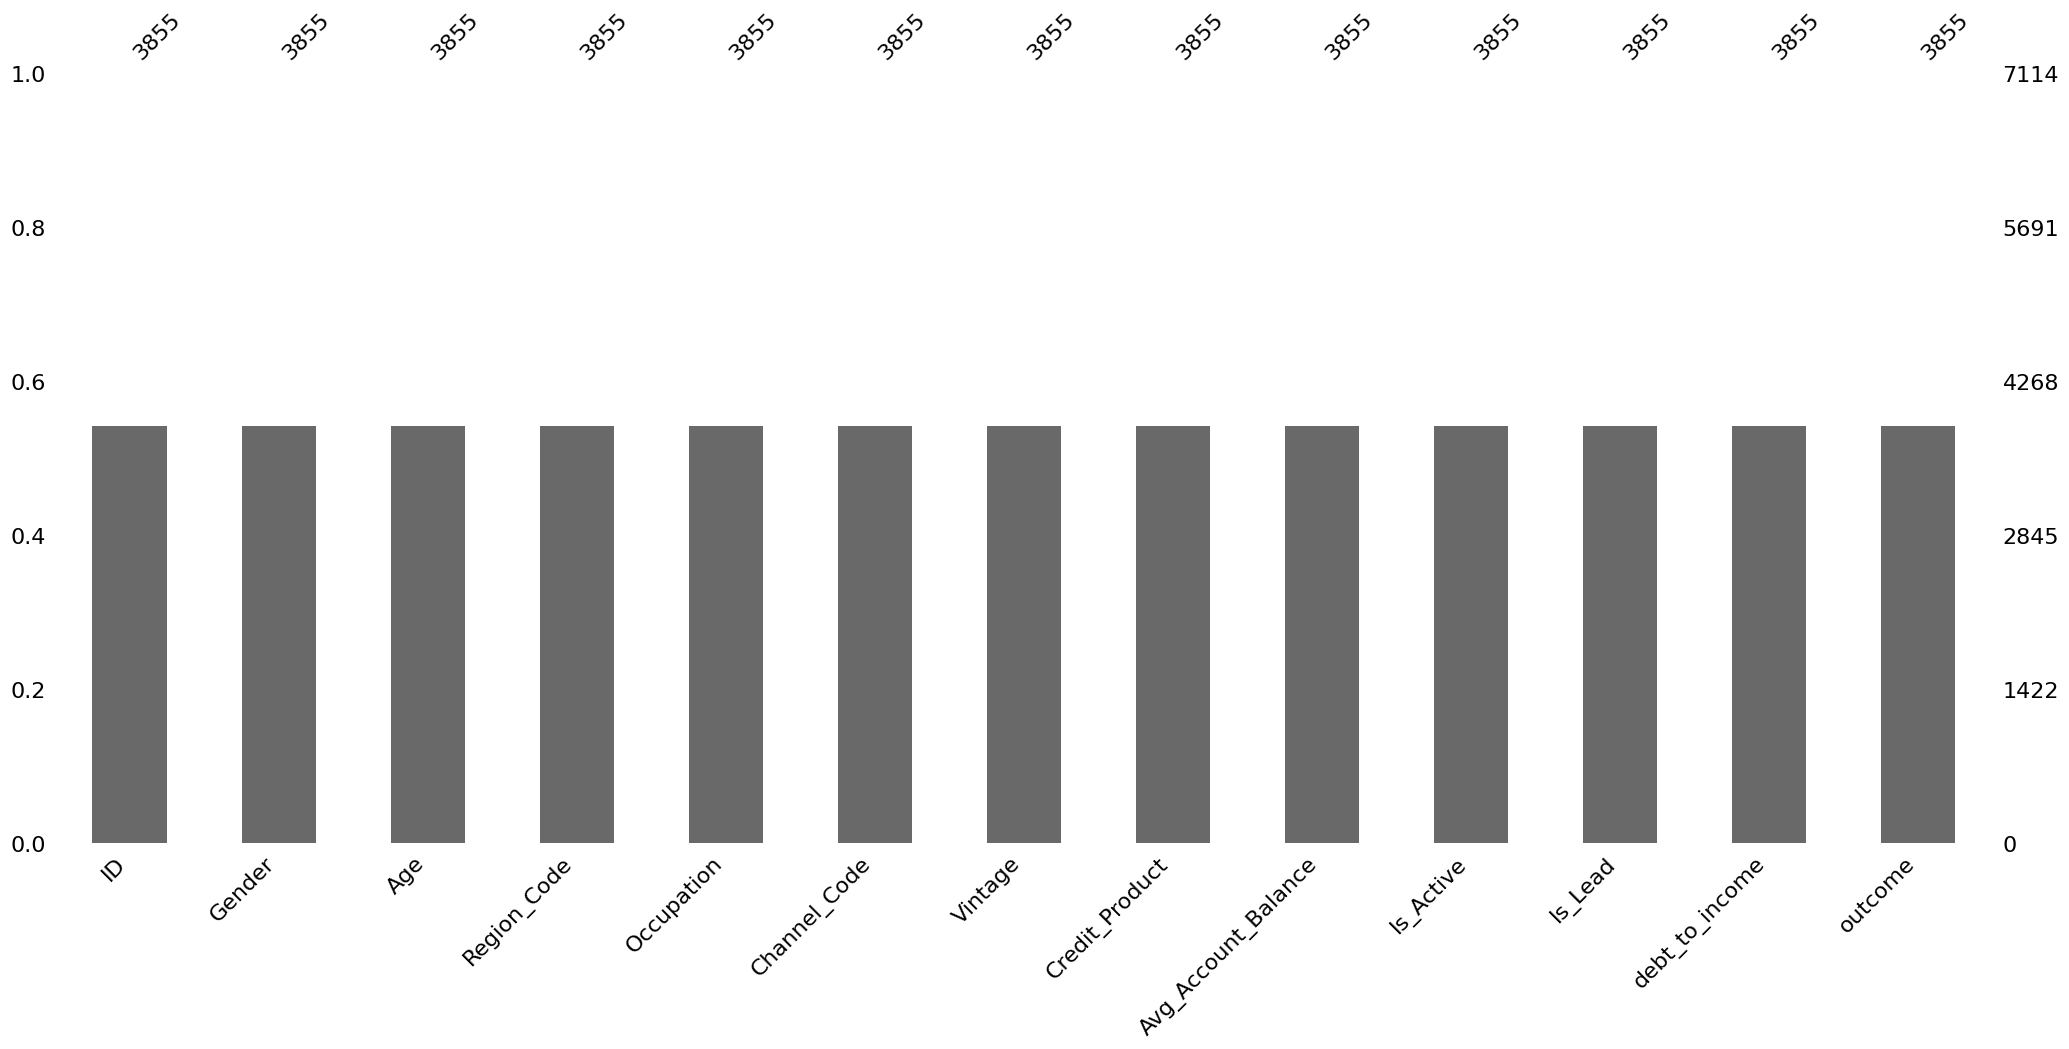

In [8]:
import missingno as msno
msno.bar(credit_data)

### b) Showing correlation between features

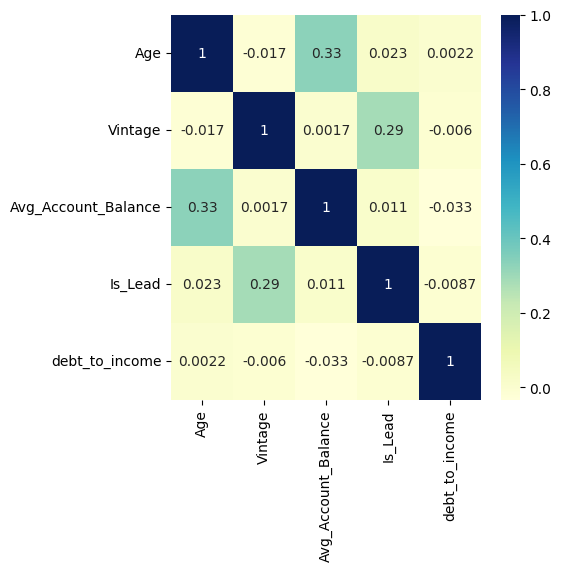

In [9]:
try:
    plt.figure(figsize = (5,5)) 
    sns.heatmap(credit_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")
except futurewarning:
    print("The default value of numeric_only in DataFrame.corr is deprecated.")


A score that is 1 shows direct correlation, one that is closer to 1 shows a positive correlation,-1 shows a negative correlation whereas 0 shows no relationship between the features.

### c) Checking distribution of data

In [10]:
print(credit_data['Is_Lead'].unique())

[ 0.  1. nan]


<AxesSubplot: xlabel='Is_Lead', ylabel='count'>

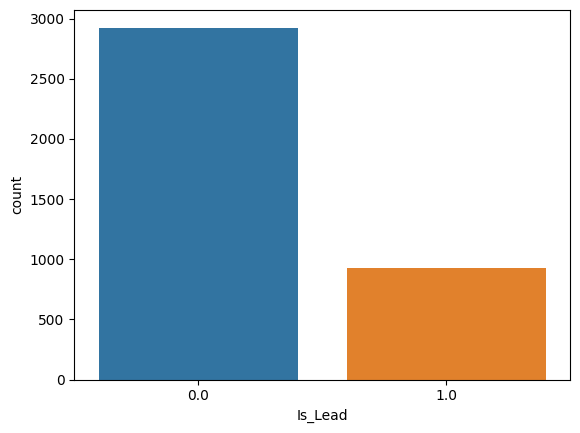

In [11]:
sns.countplot(x = "Is_Lead",data = credit_data)

From the countplot above,it is clear that there are more customers not intrested in the credit card
than those interested.

<AxesSubplot: xlabel='outcome', ylabel='count'>

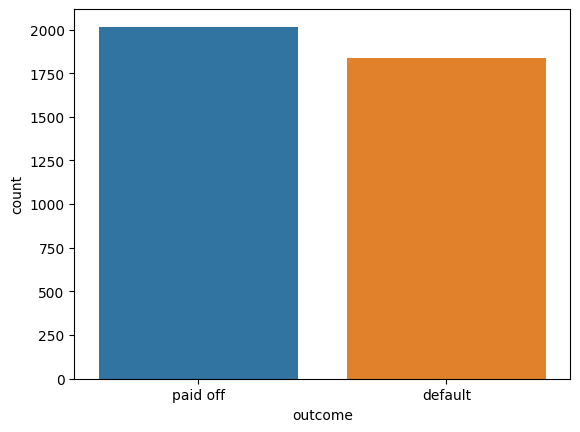

In [12]:
sns.countplot(x = "outcome",data = credit_data)

From the countplot above,it shows that more customers will pay off the credit card debt .

<AxesSubplot: xlabel='Gender', ylabel='count'>

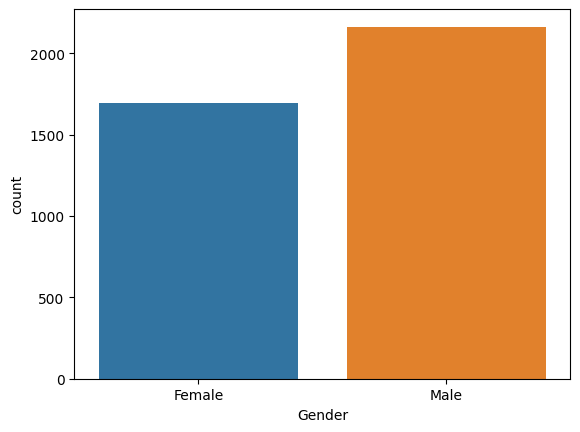

In [13]:
sns.countplot(x = "Gender",data = credit_data)

This shows the bank has more male customers than female customers. 

<AxesSubplot: xlabel='Age', ylabel='count'>

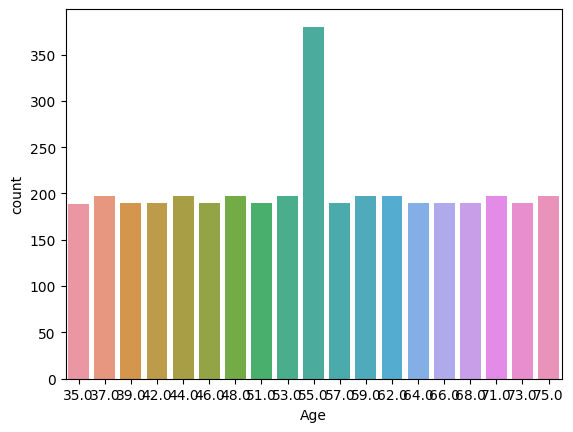

In [14]:
sns.countplot(x = "Age",data = credit_data)

Customers of the bank are equally distributed but with an unusual large number being 55 years.

<AxesSubplot: xlabel='Occupation', ylabel='count'>

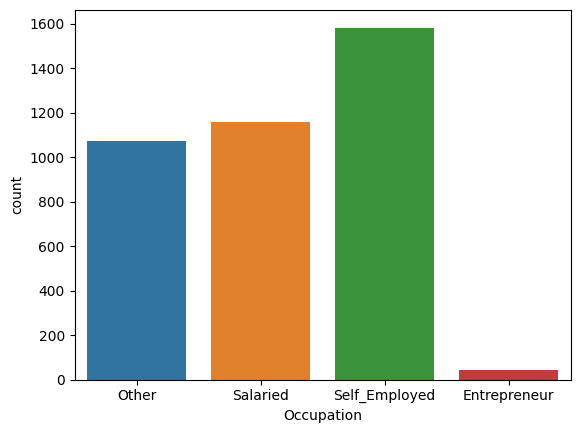

In [15]:
sns.countplot(x = "Occupation",data = credit_data)

Self-employed customers make a majority of the banks customers.

<AxesSubplot: xlabel='Is_Active', ylabel='count'>

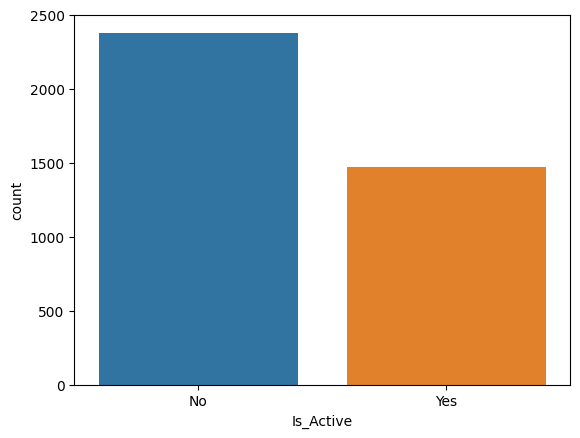

In [16]:
sns.countplot(x = "Is_Active",data = credit_data)

The data shows that more customers have not had active accounts for a while. 

### d) Outlier analysis

<AxesSubplot: xlabel='Avg_Account_Balance'>

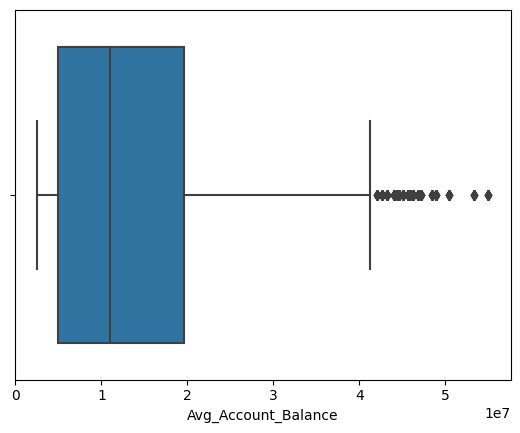

In [17]:
#outlier analysis of avg account balance
sns.boxplot(x = credit_data['Avg_Account_Balance'])

There are a lot of outliers in this column

### e) Visualizing the relationship between categorical features and Is_lead as target feature

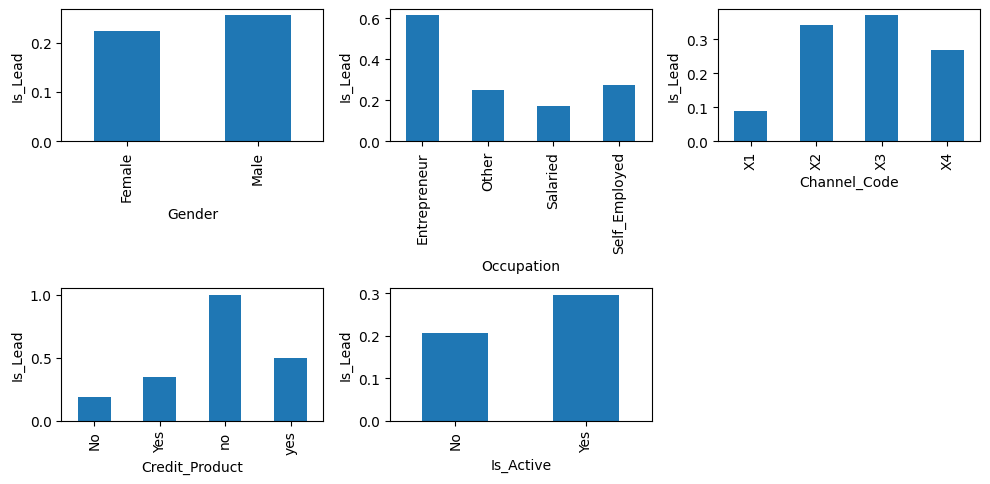

In [18]:
#define list of columns
list_of_columns =  ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active',]

plt.figure(figsize=(10,10))
for i in range(0,len(list_of_columns)):
    data = credit_data.copy()
    plt.subplot(4,3,i+1)
    credit_data.groupby(list_of_columns[i])['Is_Lead'].mean().plot(kind="bar",linewidth=3)
    plt.ylabel('Is_Lead')
    plt.tight_layout()

It is evident that male clients, entrepreneurs, those subscribed with X3, those with an existing credit product 
and the customers with an active account have a higher intent of taking the recommended credit card.

# 2. Eligible Customers

In [19]:
#using numpy
filtered_values = np.where((credit_data['Is_Active'] == 'Yes') & (credit_data['Credit_Product'] == 'Yes') & (credit_data['Avg_Account_Balance']>8000000) & (credit_data['Occupation'] == 'Salaried'))
display(credit_data.loc[filtered_values])

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,debt_to_income,outcome
61,NFKTDJEO,Male,62.0,RG268,Salaried,X2,39.0,Yes,8459371.0,Yes,1.0,15.62,default
69,AF6MCWFM,Male,55.0,RG274,Salaried,X1,26.0,Yes,8682651.0,Yes,1.0,25.06,default
277,YEJ3FOPT,Male,57.0,RG268,Salaried,X3,121.0,Yes,25328064.0,Yes,1.0,2.86,paid off
284,JZUPH3WC,Male,75.0,RG256,Salaried,X2,27.0,Yes,13617713.0,Yes,0.0,16.17,paid off
321,4VTSQTDR,Male,62.0,RG283,Salaried,X2,38.0,Yes,26305013.0,Yes,1.0,9.69,paid off
349,F62FU6DQ,Male,55.0,RG283,Salaried,X1,97.0,Yes,28786549.0,Yes,1.0,14.24,paid off
701,RUUFVFKK,Female,64.0,RG283,Salaried,X3,87.0,Yes,14409852.0,Yes,1.0,4.46,default
764,YOW6FZG8,Female,68.0,RG269,Salaried,X1,25.0,Yes,12530675.0,Yes,1.0,25.47,paid off
832,SPEXZJBZ,Female,75.0,RG254,Salaried,X1,27.0,Yes,13228797.0,Yes,0.0,19.42,default
901,M3T6SIUJ,Male,64.0,RG269,Salaried,X2,49.0,Yes,34882477.0,Yes,1.0,2.31,paid off


# 3. Line of Best Fit

In [20]:
#import libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [21]:
#drop null values
credit_data = credit_data.dropna()

In [22]:
#make a copy of dataset
cd = credit_data.copy()

In [23]:
cd

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,debt_to_income,outcome
0,NNVBBKZB,Female,71.0,RG268,Other,X3,43.0,No,3867780.0,No,0.0,22.50,paid off
1,IDD62UNG,Female,62.0,RG277,Salaried,X1,32.0,No,7264402.0,No,0.0,21.33,default
2,HD3DSEMC,Female,53.0,RG268,Self_Employed,X3,26.0,No,6615218.0,Yes,0.0,8.97,paid off
3,BF3NC7KV,Male,44.0,RG270,Salaried,X1,19.0,No,2682328.0,No,0.0,1.83,paid off
4,TEASRWXV,Female,75.0,RG282,Salaried,X1,33.0,No,4015759.0,No,0.0,10.81,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,9VZFQTNV,Female,55.0,RG252,Salaried,X1,26.0,No,21234910.0,No,0.0,6.81,paid off
3851,GVAF5QXQ,Female,39.0,RG277,Salaried,X1,25.0,No,4254114.0,No,1.0,16.31,paid off
3852,4YYOEJPK,Male,68.0,RG283,Other,X2,86.0,No,13456849.0,No,1.0,27.15,paid off
3853,MHTYXKHL,Male,57.0,RG268,Other,X2,19.0,Yes,26620367.0,Yes,0.0,21.09,paid off


In [24]:
#add constant after selecting the two columns
X = sm.add_constant(cd["Age"])
y = cd["Avg_Account_Balance"]
print(X.shape)
print(y.shape)
X

(3855, 2)
(3855,)


,const,Age
0,1.0,71.0
1,1.0,62.0
2,1.0,53.0
3,1.0,44.0
4,1.0,75.0
...,...,...
3850,1.0,55.0
3851,1.0,39.0
3852,1.0,68.0
3853,1.0,57.0


In [25]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size= 0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3084, 2)
(771, 2)
(3084,)
(771,)


In [26]:
#fit the model
cd_model = sm.OLS(y_train, X_train).fit()

In [27]:
#model summary
cd_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                 Adj. R-squared:     0.112      
Dependent Variable:   Avg_Account_Balance AIC:                108124.7532
Date:                 2023-01-16 15:01    BIC:                108136.8211
No. Observations:     3084                Log-Likelihood:     -54060.    
Df Model:             1                   F-statistic:        390.3      
Df Residuals:         3082                Prob (F-statistic): 6.82e-82   
R-squared:            0.112               Scale:              9.8530e+13 
-------------------------------------------------------------------------
          Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-------------------------------------------------------------------------
const -2421007.9042 840648.0710 -2.8799 0.0040 -4069295.1589 -772720.6495
Age     294377.2894  14900.9301 19.7556 0.0000   265160.5291  323594.0497
-------------------------------------------------------------------------
Omnibus:               677.912         Durbin-Watson:            2.034   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         1332.970
Skew:                  1.316           Prob(JB):                 0.000   
Kurtosis:              4.857           Condition No.:            265     
=========================================================================

"""

In [28]:
#plot line of best fit
y_pred_test = cd_model.predict(X_test)
y_pred_train = cd_model.predict(X_train)

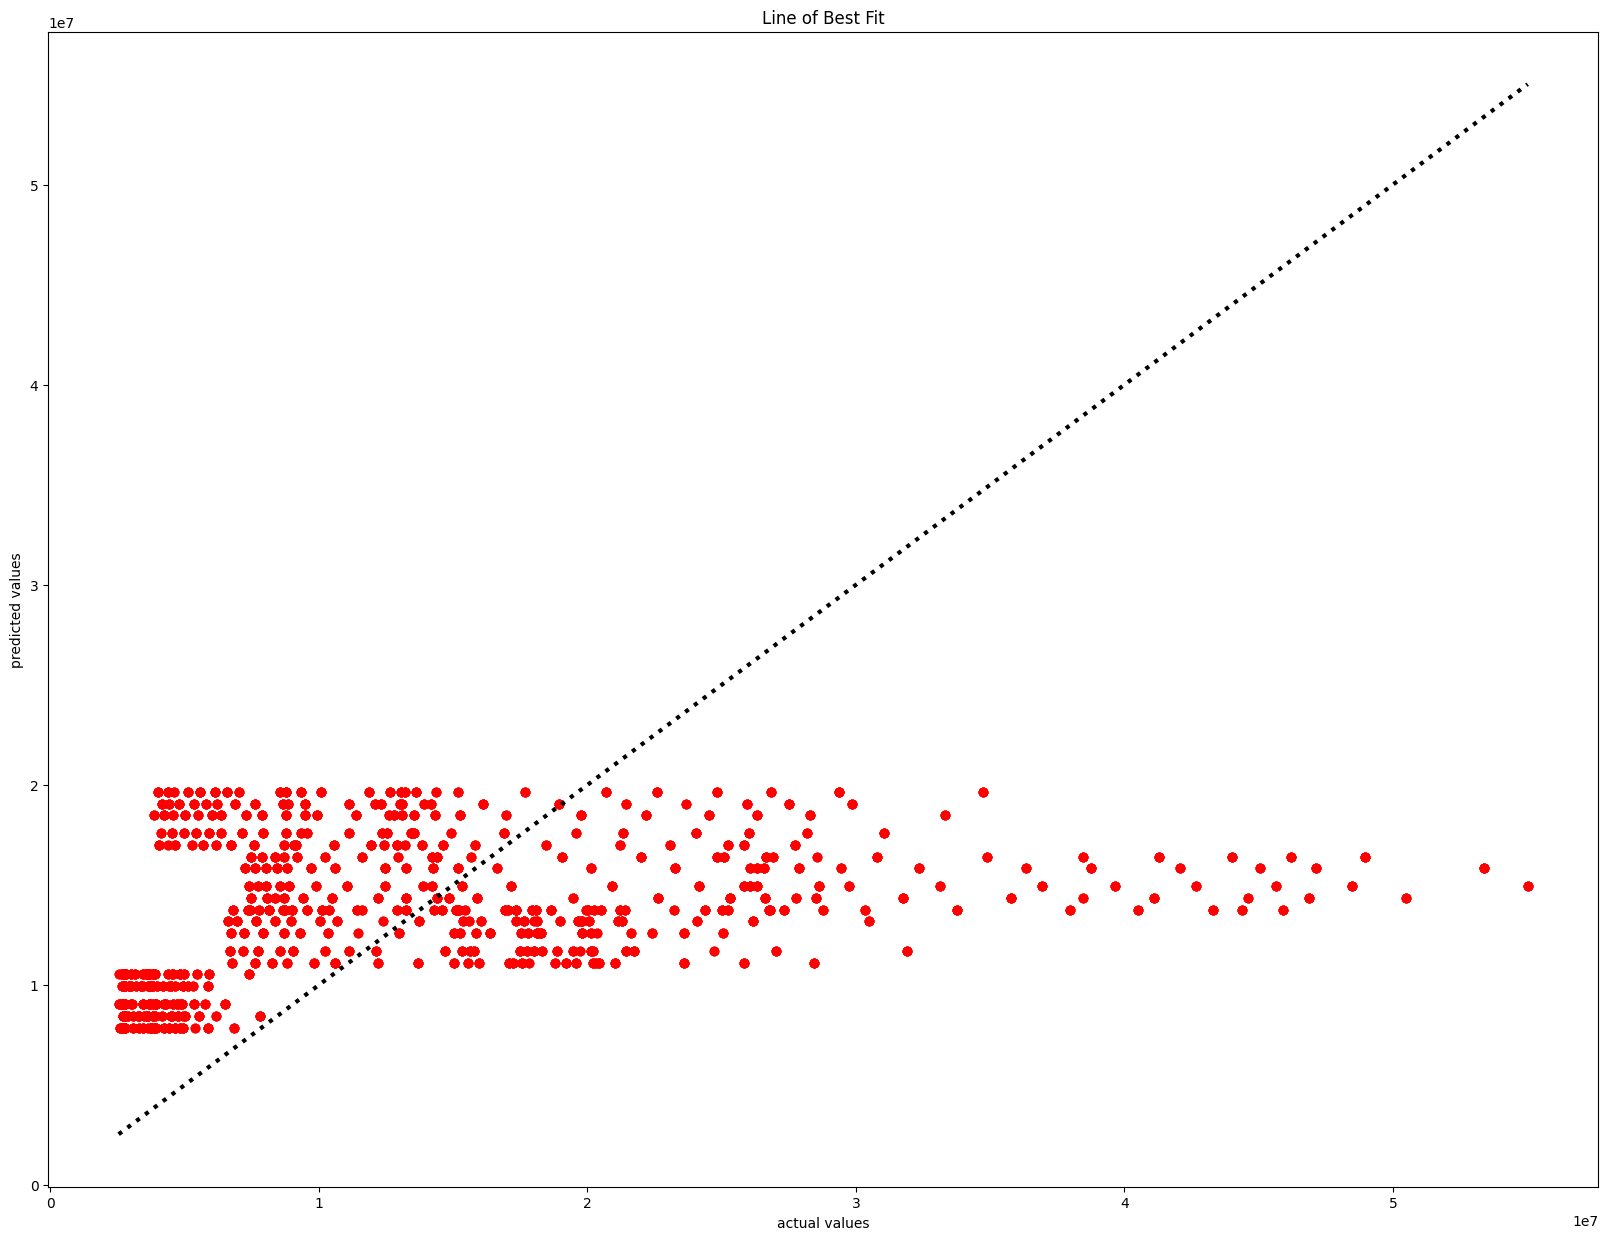

In [29]:
plt.figure(figsize = (20,15))
plt.scatter(y_train, y_pred_train, c = 'red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],linestyle = 'dotted', c = 'black', lw = 3)
plt.title('Line of Best Fit')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

In [30]:
#make predictions
#30
cd_model.predict([[1,30]])

array([6410310.77713444])

In [31]:
#50
cd_model.predict([[1,50]])

array([12297856.5646931])

In [32]:
#80
cd_model.predict([[1,80]])

array([21129175.24603111])